In [1]:
import numpy as np
import sklearn
import pandas as pd
from sklearn import preprocessing
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from time import time

In [2]:
# grid search
def grid_search_model(X, Y, model, parameters, cv):
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-2)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)

In [3]:
#validation curve
def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):

    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring='r2',n_jobs=-2)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Validation curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

    if log==True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)
    plt.grid()
    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(loc="best")
    print(parameters)
    print(test_scores_mean)
    return plt  

In [4]:
# Learning curve
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, scoring='r2', n_jobs=-2, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

In [5]:
df = pd.read_csv("subpacket_data.csv")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna()

df = df[df.dts < 2000]
df = df[df.aes < 10]
df = df[df.devs < 10]
df = df[df.freqs < 0.5]
df = df[abs(df.slopes) < 0.1]
df = df[(df.slopes) > 0.]
df['amp_log']=np.log10(df['amps'])
df['beta_log']=np.log10(df['betas'])
df['dt_log']=np.log10(df['dts'])
df['dev_log']=np.log10(df['devs'])
df['sl_log']=np.log10(df['slopes'])
df = df[df.dev_log >-20]
df['lat']=abs(df.mlts)
""""
df = df[abs(df.mlat)<5]
df = df[df.den<100]
#df = df[df.bep > 0]
#df = df[df.bez > 0]
df['theta5']=np.arctan(df['sl']/2500.)
df['theta_fce']=np.arctan(df['sl']/df['fce']*2.)
df['den_log']=np.log10(df['den'])
df['mlt_m']=np.mod(df['mlt']+3,24)
df['fpefce_log']=np.log10(df['fpefce'])
df['sl_norm']=df['sl']/df['fce']**2
df['sl_log']=np.log10(df['sl_norm'])
df['tw_log']=np.log10(df['tw']*df['fce'])
df['fw_log']=np.log10(df['fw'])
df['bw_log']=np.log10(df['bw'])
"""

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165519 entries, 0 to 295420
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   dts       165519 non-null  float64
 1   slopes    165519 non-null  float64
 2   amps      165519 non-null  float64
 3   devs      165519 non-null  float64
 4   freqs     165519 non-null  float64
 5   aes       165519 non-null  float64
 6   betas     165519 non-null  float64
 7   ls        165519 non-null  float64
 8   mlts      165519 non-null  float64
 9   mlats     165519 non-null  float64
 10  pcs       165519 non-null  float64
 11  amp_log   165519 non-null  float64
 12  beta_log  165519 non-null  float64
 13  dt_log    165519 non-null  float64
 14  dev_log   165519 non-null  float64
 15  sl_log    165519 non-null  float64
 16  lat       165519 non-null  float64
dtypes: float64(17)
memory usage: 22.7 MB


c:\users\zyxia\miniconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,dts,slopes,amps,devs,freqs,aes,betas,ls,mlts,mlats,pcs,amp_log,beta_log,dt_log,dev_log,sl_log,lat
count,165519.000000,1.655190e+05,165519.000000,1.655190e+05,165519.000000,165519.000000,1.655190e+05,165519.000000,165519.000000,165519.000000,165519.000000,165519.000000,165519.000000,165519.000000,165519.000000,165519.000000,165519.000000
mean,19.685793,6.913856e-03,0.000914,3.437461e-03,0.270180,0.311561,4.620744e-02,5.641530,11.267353,-7.566465,6.470542,-3.156719,-1.489702,1.053670,-4.342654,-2.620878,11.267353
std,29.833477,1.170346e-02,0.000932,2.894971e-02,0.082543,0.252646,4.282384e-02,0.431755,1.544808,9.035022,3.156703,0.292004,0.460659,0.440302,2.056448,0.712874,1.544808
min,1.132623,4.650000e-19,0.000115,4.400000e-19,0.097803,-0.915800,3.450000e-10,3.823337,7.876957,-19.823001,1.810059,-3.939559,-9.462181,0.054085,-18.356547,-18.332547,7.876957
25%,5.169217,9.153735e-04,0.000427,2.860000e-06,0.209361,0.206384,2.058239e-02,5.430173,10.031107,-14.747043,4.232984,-3.369222,-1.686504,0.713425,-5.543634,-3.038402,10.031107
50%,10.696722,2.500406e-03,0.000617,6.630000e-05,0.265353,0.302539,3.459659e-02,5.732527,11.152707,-9.805865,5.378776,-3.209716,-1.460967,1.029251,-4.178486,-2.601989,11.152707
75%,23.124850,7.317112e-03,0.001029,2.139384e-03,0.326329,0.402585,5.624034e-02,5.897500,12.229238,-3.368561,8.612328,-2.987656,-1.249952,1.364079,-2.669711,-2.135660,12.229238
max,1736.665536,9.994684e-02,0.022482,6.660962e+00,0.498500,8.827253,3.392306e-01,6.539521,15.502416,15.507975,23.897003,-1.648167,-0.469505,3.239716,0.823537,-1.000231,15.502416


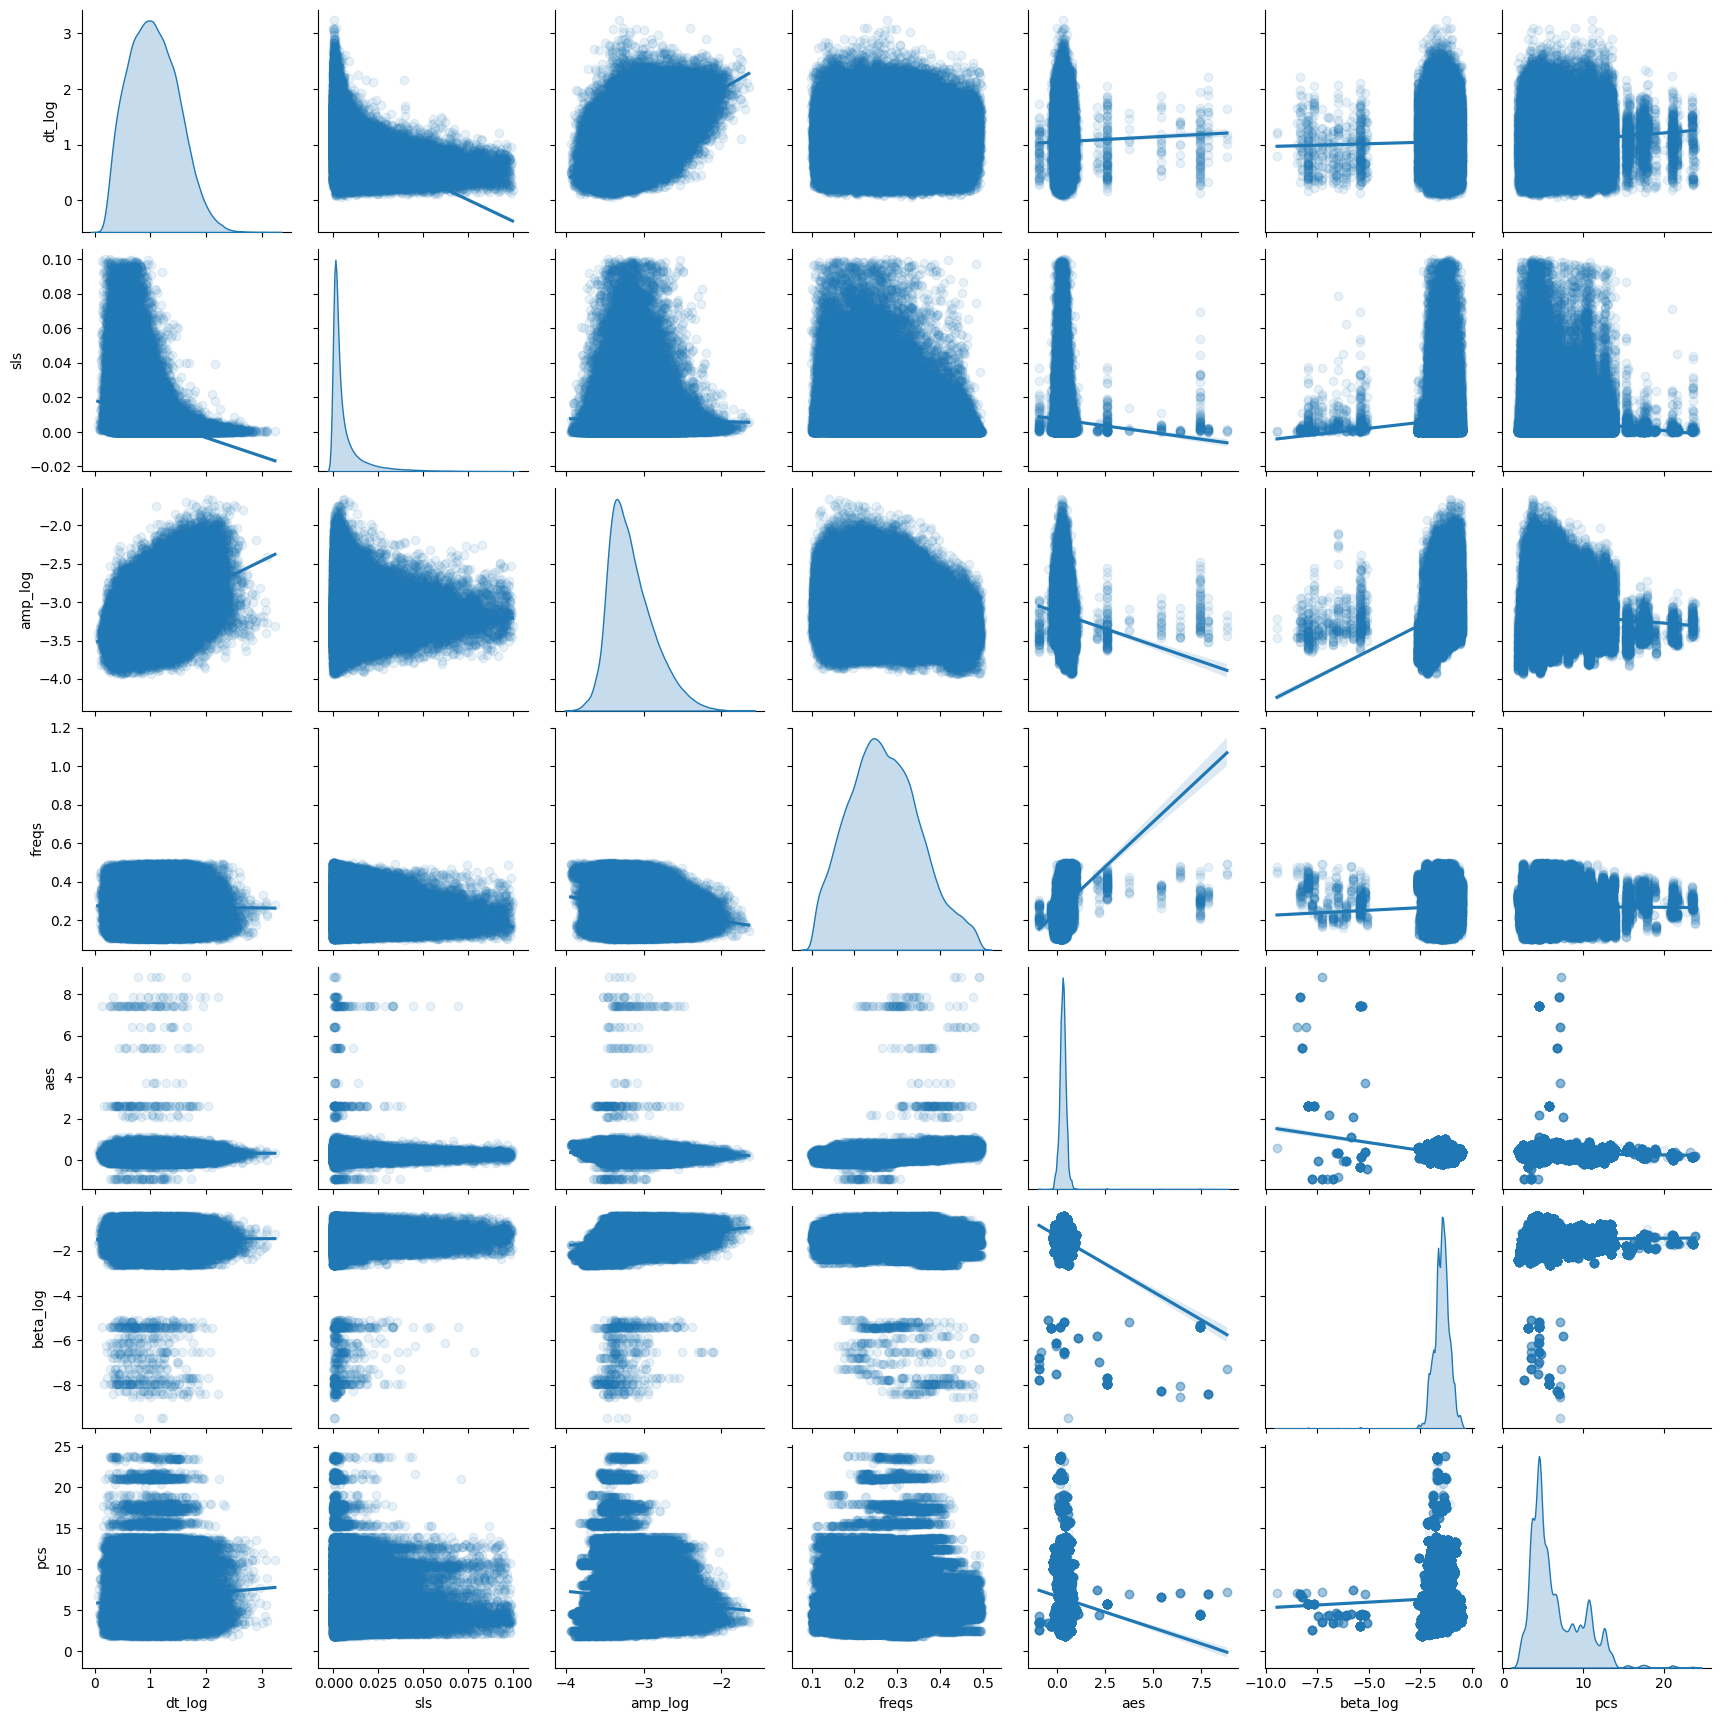

In [29]:


dataset = df.copy()
_ = sns.pairplot(
    dataset[['dt_log','slopes', 'amp_log', 'freqs', 'aes', 'beta_log','pcs']],
    kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})

In [25]:
X = df[['freqs','slopes','amp_log','aes','betas','pcs','ls','mlts','lat']]  #  X will hold all features
#y = df['theta5']/np.pi # y will hold target/labels
y = df['dt_log']
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)
X.describe()
y.describe()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 628)

In [26]:
param_grid = dict(criterion=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],max_depth=(np.linspace(5, 20, 5)).astype(int))
grid_search_model(X_train, y_train, DecisionTreeRegressor(), param_grid, 5)

Best Score: 0.401085752868649  / Best parameters: {'criterion': 'poisson', 'max_depth': 8}


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

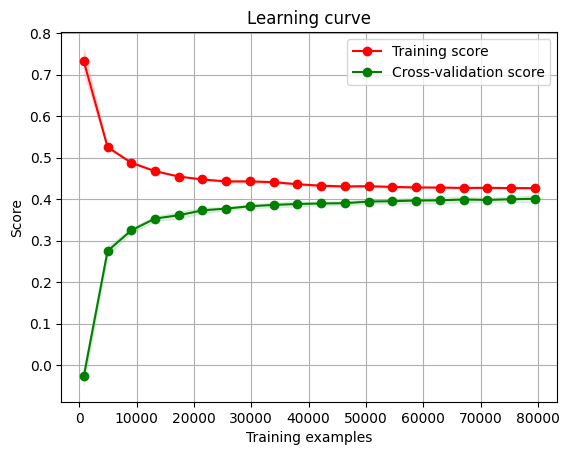

In [27]:
dtr = DecisionTreeRegressor(ccp_alpha=0.000, criterion='poisson',max_depth=8)
train_size=np.linspace(.01, 1, 20)
Learning_curve_model(X_train, y_train, dtr, 5, train_size)

['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
[0.60077661 0.59697653 0.6006406  0.60180738]


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

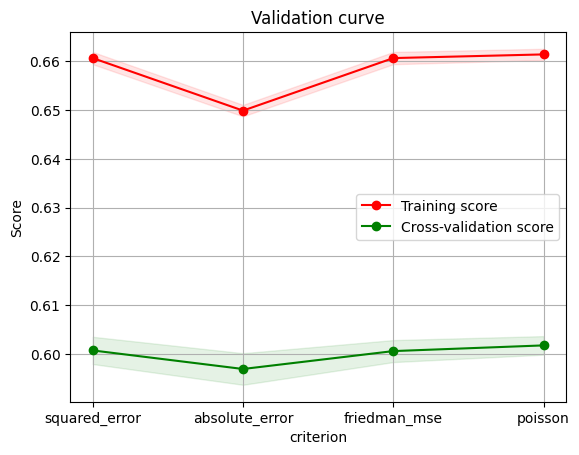

In [14]:
dtr = DecisionTreeRegressor(ccp_alpha=0.000, criterion='poisson',max_depth=10)
param_range = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
param_name="criterion"
validation_curve_model(X_train, y_train, dtr, param_name, param_range, 5, None, log=False)


[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[0.41079285 0.48546227 0.53417089 0.5618311  0.57957698 0.59379858
 0.60328432 0.60670113 0.60182619 0.58681852 0.56818919 0.54120144
 0.51285008 0.48094912 0.45084281 0.42131216 0.39242044 0.36824539
 0.35011741]


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

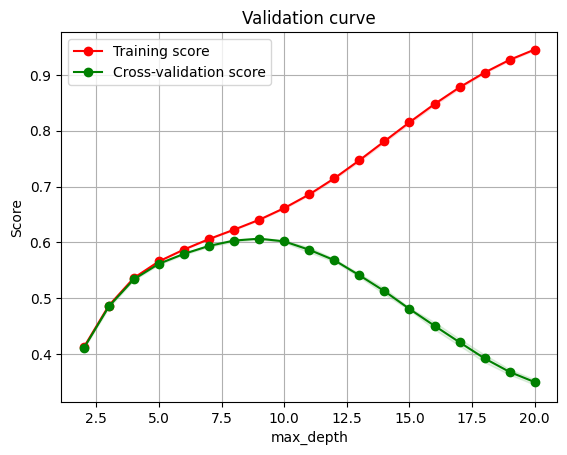

In [16]:
dtr = DecisionTreeRegressor(ccp_alpha=0.000, criterion='poisson',max_depth=10)
param_range = (np.linspace(2, 20, 19)).astype(int)
param_name="max_depth"
validation_curve_model(X_train, y_train, dtr, param_name, param_range, 5, None, log=False)

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')
importances = model.feature_importances_



model score on training data: 0.9509668386299557
model score on testing data: 0.6539523018283462


In [15]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')



model score on training data: 0.36922680647750583
model score on testing data: 0.2885307274690807


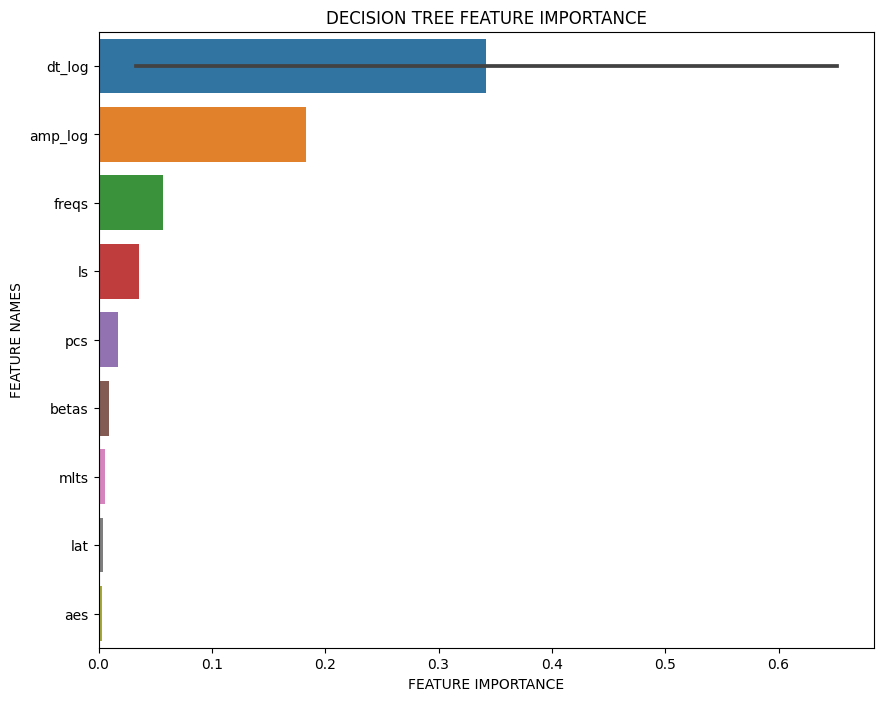

In [17]:
model = DecisionTreeRegressor(ccp_alpha=0.000, criterion='poisson',max_depth=9)

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')
importances = model.feature_importances_
plot_feature_importance(importances,X_train.columns,'DECISION TREE ')


In [18]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

# This function could directly be access from sklearn
# from sklearn.inspection import permutation_importance

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

In [19]:
perm_importance_result_train = permutation_importance(
    model, X_train, y_train, n_repeats=10)


ValueError: could not broadcast input array from shape (99311,2) into shape (99311,)

In [ ]:
plot_feature_importance(perm_importance_result_train['importances_mean'],X_train.columns,'permutation Decision Tree ')

In [ ]:
param_grid = dict(ccp_alpha=np.linspace(0.000001, 0.01, 20),criterion=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],max_depth=(np.linspace(2, 10, 5)).astype(int))
grid_search_model(X_train, y_train, DecisionTreeRegressor(), param_grid, 5)

<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

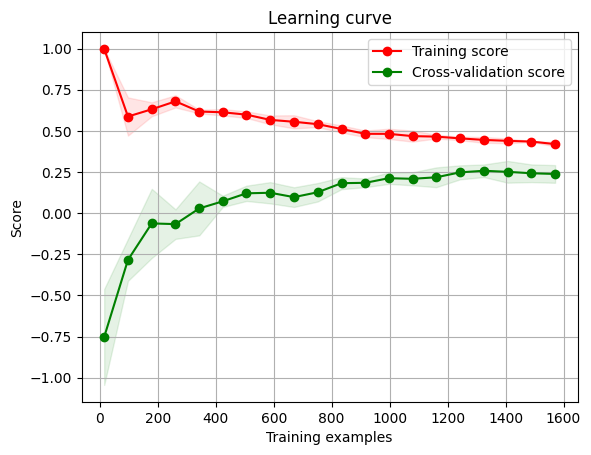

In [23]:
dtr = DecisionTreeRegressor(ccp_alpha=0.0005, criterion='absolute_error',max_depth=6)
train_size=np.linspace(.01, 1, 20)
Learning_curve_model(X_train, y_train, dtr, 5, train_size)

Feature: 0, Score: 0.40505
Feature: 1, Score: 0.10144
Feature: 2, Score: 0.05788
Feature: 3, Score: 0.17931
Feature: 4, Score: 0.21620
Feature: 5, Score: 0.01653
Feature: 6, Score: 0.02359


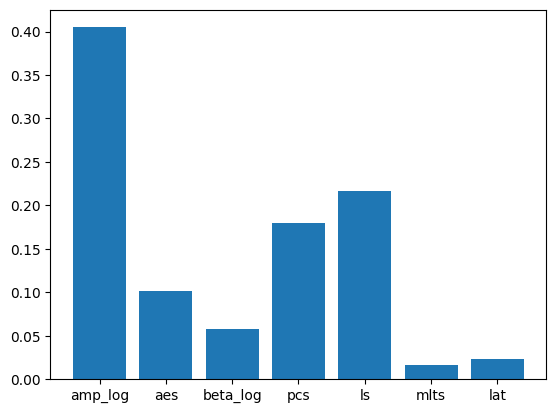

In [24]:
dtr = DecisionTreeRegressor(ccp_alpha=0.000, criterion='absolute_error',max_depth=6)
from matplotlib import pyplot
dtr.fit(X_train, y_train)
importance = dtr.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X_train.columns[x] for x in range(len(importance))], importance)
pyplot.show()

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 40]
[ 0.08743924  0.17870439  0.23232275  0.20286545  0.13417369  0.05184645
 -0.01433098 -0.09909186 -0.10162928 -0.11638279 -0.12887247 -0.10623658
 -0.13092208 -0.14337595 -0.13265025 -0.12020265 -0.09823657 -0.0905379
 -0.13256475 -0.12606951]


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

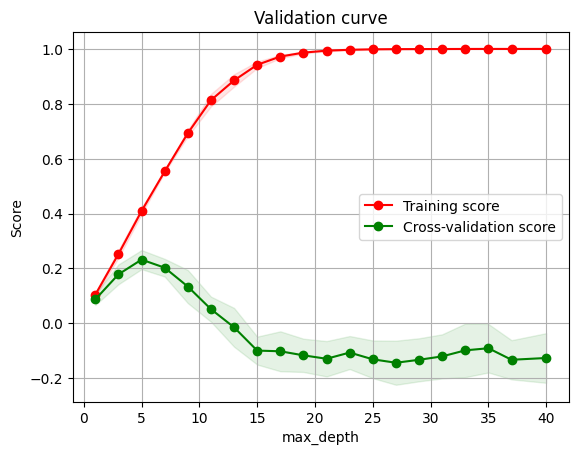

In [25]:
dtr = DecisionTreeRegressor(ccp_alpha=0.000, criterion='absolute_error',max_depth=8)
param_range = np.linspace(1, 40, 20).astype(int)
param_name="max_depth"
validation_curve_model(X_train, y_train, dtr, param_name, param_range, 5, None, log=False)

In [15]:
dtr_best = DecisionTreeRegressor(ccp_alpha=0.000, criterion='absolute_error',max_depth=5)
dtr_best.fit(X_train, y_train)
dtr_test = dtr_best.predict(X_test)
dtr_train = dtr_best.predict(X_train)
print(r2_score(y_train, dtr_train))
print(r2_score(y_test, dtr_test))

0.6609161399730628
0.6286975993008692


In [23]:
param_grid = dict(hidden_layer_sizes=[4, 8,16,32, 64, 128, 256,512,1024,2048], activation=['identity', 'logistic', 'tanh', 'relu'])
grid_search_model(X_train, y_train, MLPRegressor(max_iter=1000), param_grid, 5)

Best Score: 0.6444656195231759  / Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 2048}


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

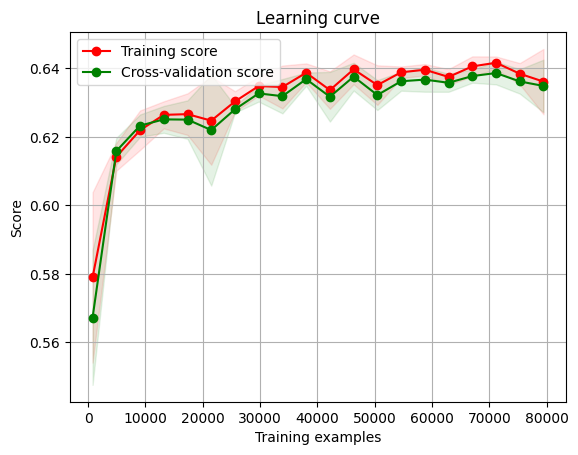

In [30]:
nnc = MLPRegressor(hidden_layer_sizes=108,activation='relu',max_iter=400)

train_size=np.linspace(.01, 1, 20)
Learning_curve_model(X_train, y_train, nnc, 5, train_size)

[  2  15  28  42  55  68  82  95 108 122 135 149 162 175 189 202 215 229
 242 256]
[0.45930757 0.61553209 0.62812798 0.63071648 0.6343889  0.63543394
 0.63797417 0.63708821 0.64104349 0.63848297 0.63435916 0.63823403
 0.63974211 0.64090795 0.64289087 0.64209391 0.64395659 0.64184844
 0.63967355 0.63729662]


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

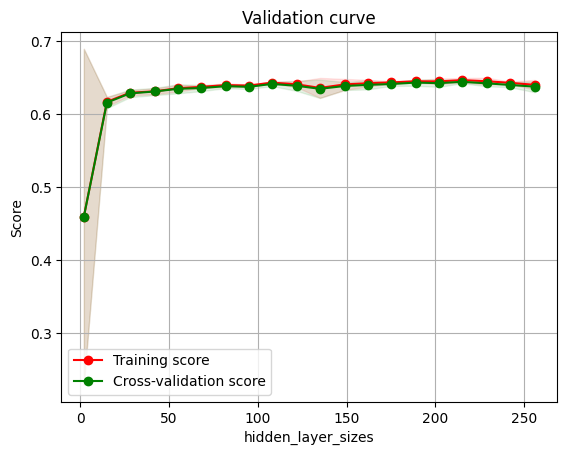

In [27]:
nnc = MLPRegressor(hidden_layer_sizes=100,activation='relu',max_iter=400)
param_range = np.linspace(2,256,20, dtype=int)
param_name="hidden_layer_sizes"
validation_curve_model(X_train, y_train, nnc, param_name, param_range, 5, None, log=False)


In [40]:
X = df[['amp_log','sls','aes','betas','pcs','ls','mlts','lat','freqs']]  #  X will hold all features
#y = df['theta5']/np.pi # y will hold target/labels
y = df['dt_log']
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)
X.describe()
y.describe()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 628)

In [41]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')
importances = model.feature_importances_



model score on training data: 0.9509591355960472
model score on testing data: 0.6531471553480858


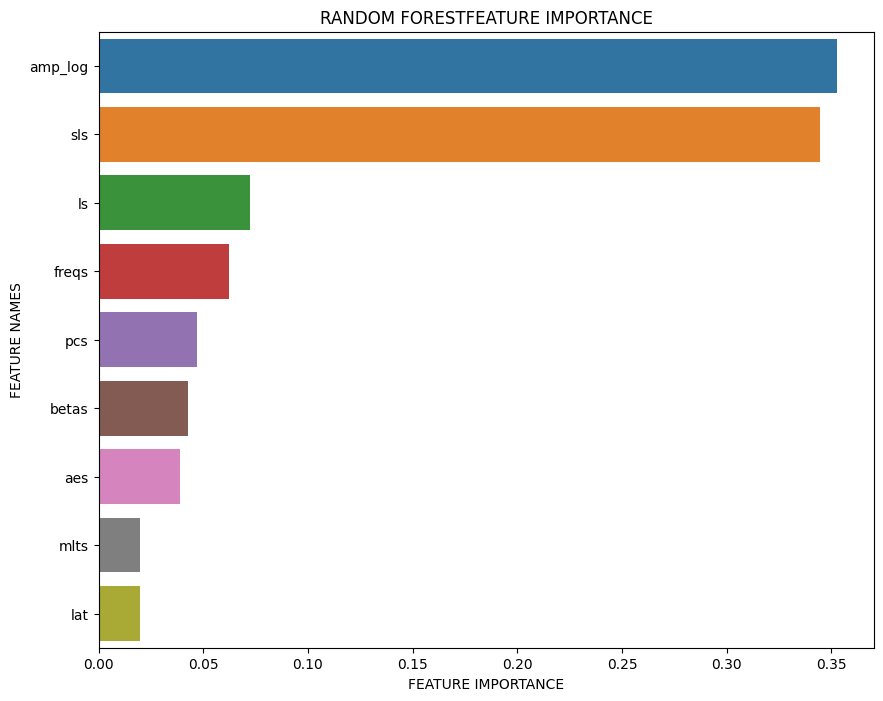

In [42]:
plot_feature_importance(importances,X_train.columns,'RANDOM FOREST')


In [45]:
perm_importance_result_train = permutation_importance(
    model, X_train, y_train, n_repeats=10)


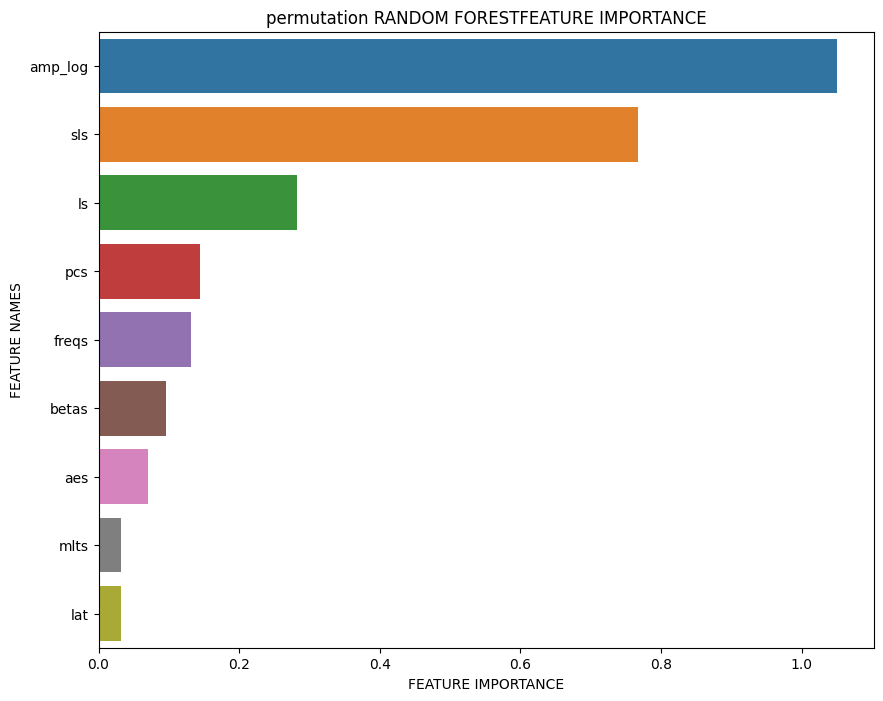

In [46]:
plot_feature_importance(perm_importance_result_train['importances_mean'],X_train.columns,'permutation RANDOM FOREST')

In [ ]:
param_grid = dict(n_estimators=[4, 8,16,32, 64, 128, 256,512], criterion=['squared_error', 'absolute_error', 'friedman_mse', 'poisson'])
grid_search_model(X_train, y_train, RandomForestRegressor(), param_grid, 5)

<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

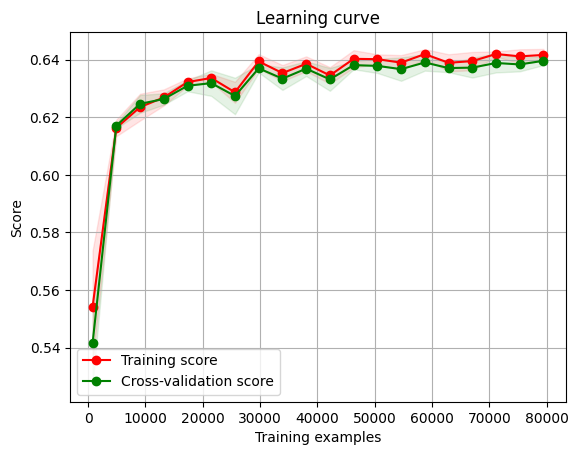

In [44]:
nnc = MLPRegressor(hidden_layer_sizes=108,activation='relu',max_iter=400)

train_size=np.linspace(.01, 1, 20)
Learning_curve_model(X_train, y_train, nnc, 5, train_size)

[  2  15  28  42  55  68  82  95 108 122 135 149 162 175 189 202 215 229
 242 256]
[0.4115972  0.623022   0.63049009 0.63290546 0.63365274 0.63551651
 0.63766265 0.63611449 0.63828435 0.63959501 0.64003558 0.63914065
 0.64064531 0.6426778  0.6395882  0.64384009 0.64088636 0.6380598
 0.6436272  0.64179404]


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

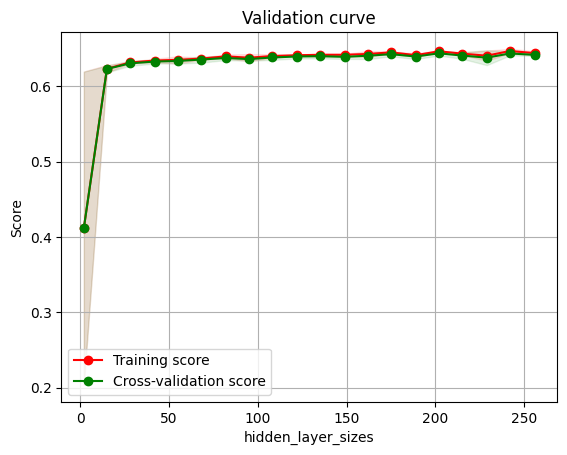

In [47]:
nnc = MLPRegressor(hidden_layer_sizes=100,activation='relu',max_iter=400)
param_range = np.linspace(2,256,20, dtype=int)
param_name="hidden_layer_sizes"
validation_curve_model(X_train, y_train, nnc, param_name, param_range, 5, None, log=False)


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

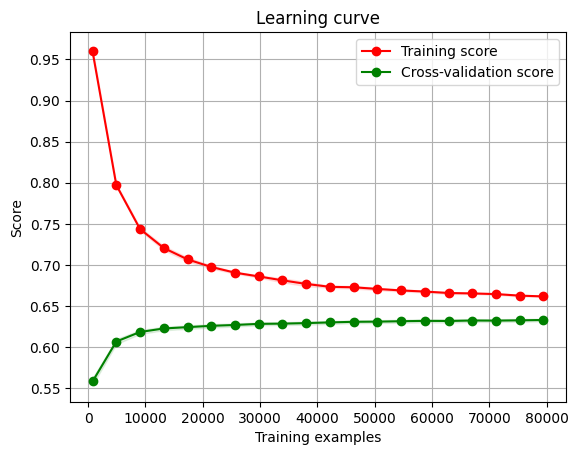

In [31]:

abr = AdaBoostRegressor(base_estimator=model,learning_rate=0.1,n_estimators=64)
train_size=np.linspace(.01, 1, 20)
Learning_curve_model(X_train, y_train, abr, 5, train_size)

[24, 32, 40, 48, 56]
[0.63152181 0.63265609 0.63292055 0.63349866 0.63316785]


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

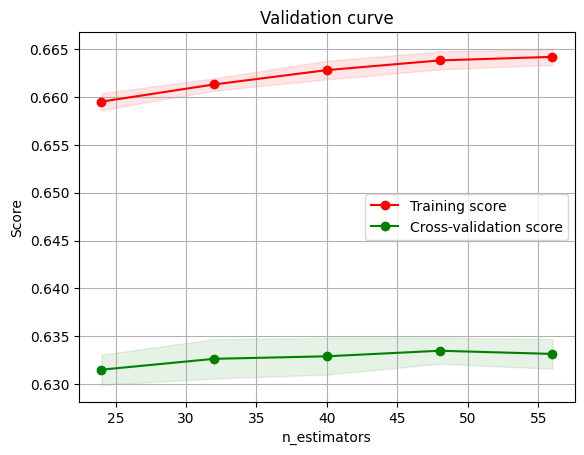

In [38]:
dtr = DecisionTreeRegressor(ccp_alpha=0.000, criterion='poisson',max_depth=9)
abr = AdaBoostRegressor(base_estimator=dtr,learning_rate=0.1,n_estimators=64)
param_range = [24,32, 40, 48, 56]
param_name="n_estimators"
validation_curve_model(X_train, y_train, abr, param_name, param_range, 5, None, log=False)

[0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
[0.63291142 0.63325412 0.63355816 0.63351032 0.63346192 0.6332162 ]


<module 'matplotlib.pyplot' from 'c:\\users\\zyxia\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

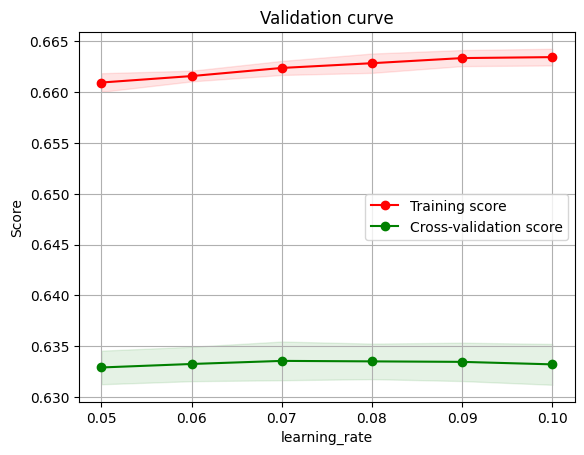

In [41]:
dtr = DecisionTreeRegressor(ccp_alpha=0.000, criterion='poisson',max_depth=9)
abr = AdaBoostRegressor(base_estimator=dtr,learning_rate=0.1,n_estimators=48)
param_range = [0.05,0.06,0.07,0.08,0.09,0.1]
param_name="learning_rate"
validation_curve_model(X_train, y_train, abr, param_name, param_range, 5, None, log=False)

In [42]:
abr = AdaBoostRegressor(base_estimator=dtr,learning_rate=0.08,n_estimators=48)
abr.fit(X_train, y_train)
abr_test = abr.predict(X_test)
abr_train = abr.predict(X_train)
print(r2_score(y_train, abr_train))
print(r2_score(y_test, abr_test))

0.6597431132670735
0.637432210655996


In [44]:

dtr.fit(X_train, y_train)
dtr_test = dtr.predict(X_test)
dtr_train = dtr.predict(X_train)
print(r2_score(y_train, dtr_train))
print(r2_score(y_test, dtr_test))

0.6372684675605444
0.6122647471353786


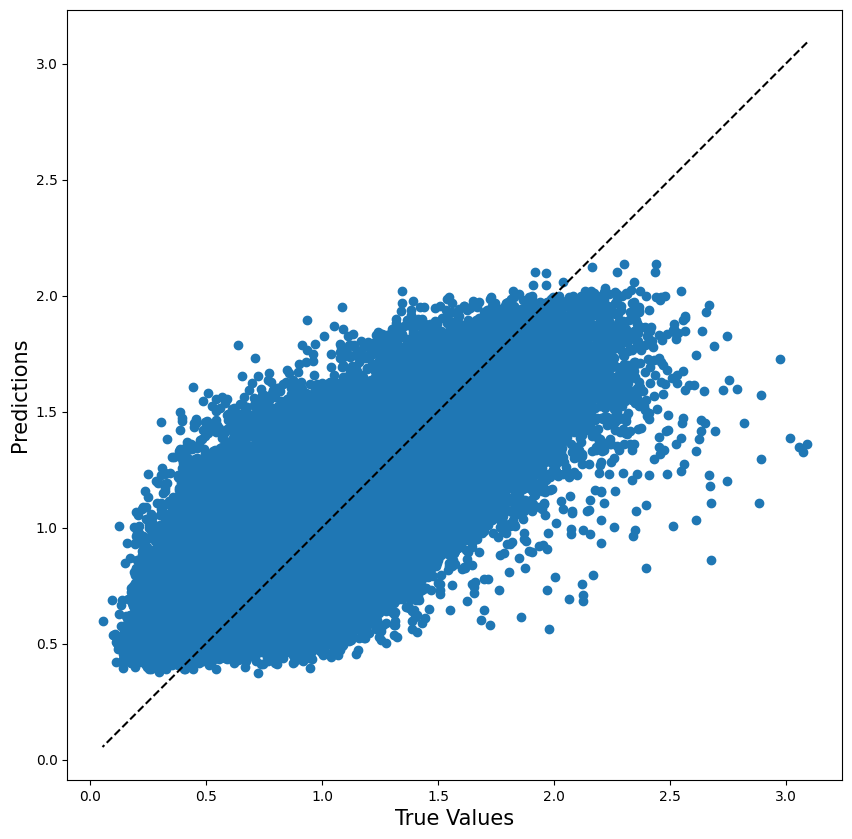

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, abr_test)


p1 = max(max(abr_test), max(y_test))
p2 = min(min(abr_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'k--')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()